# Steps revision:
1. Load dataset
2. Split the dataset into train and test
3. Feature scaling
4. Apply PCA function
  
  **Note**: When applying PCA function, it expects the parameter to be a **dataframe**, so make sure to convert to dataframe before applying PCA

        n_components = 2
        pca = PCA(n_components=n_components)

        x_train_pca = pca.fit_transform(X_train)

        x_test_pca = pca.transform(X_test)

        x_tr_df = pd.DataFrame(x_train_pca, columns=["PC (1)", "PC (2)"])

        x_test_df = pd.DataFrame(x_test_pca, columns=["PC (1)", "PC (2)"])

5. Fitting logistic regression
        lr = LogisticRegression()

        lr.fit(x_tr_df, y_train)

6. Predict test set
        y_pred = lr.predict(x_test_df)

7. Visualize the test results
        plt.scatter(x_test_df.iloc[:, 0], x_test_df.iloc[:, 1],
                    c= y_pred
                    )
        
        # OR
        
        # giving a larger plot
        plt.figure(figsize=(8, 6))

        plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1],
                    c=y_test['target'],
                    cmap='plasma')

        # # labeling x and y axes
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()


# **PCA**







#Step 1 : import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [5]:
# cancer = load_breast_cancer(as_frame=True)
# X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# y = pd.DataFrame(cancer.target, columns=["target"])


cancer = load_breast_cancer()

X = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
y =  pd.DataFrame(data=cancer.target, columns=["target"])


In [4]:
print(X.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [6]:
print(y.sample(10))
print(y.shape)

     target
181       0
460       0
107       1
332       1
43        0
29        0
313       1
531       1
221       1
215       0
(569, 1)


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [14]:
scaler = StandardScaler()


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [15]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [17]:

n_components = 2
pca = PCA(n_components=n_components)


x_train_pca = pca.fit_transform(X_train)

x_test_pca = pca.transform(X_test)

# Convert x_pca to dataframe Make sure to add columns as each column represent pca number
# x_tr_df = pd.DataFrame(x_train_pca, columns=['PC{}'.
#                        format(i+1)
#                         for i in range(n_components)])

# x_test_df = pd.DataFrame(x_test_pca, columns=['PC{}'.
#                        format(i+1)
#                         for i in range(n_components)])

x_tr_df = pd.DataFrame(x_train_pca, columns=["PC (1)", "PC (2)"])

x_test_df = pd.DataFrame(x_test_pca, columns=["PC (1)", "PC (2)"])

print(x_tr_df.head())
print("-----------")
print(x_test_df.head())

     PC (1)    PC (2)
0  4.244903  9.131428
1  9.053755  0.475310
2 -2.275374  3.278471
3 -2.510453  0.743743
4 -2.302848  2.665155
-----------
     PC (1)    PC (2)
0 -0.891656  0.643475
1  2.574275 -4.651658
2  1.293122 -1.175431
3 -0.938165  2.719665
4 -1.641887  2.685635


#Step 6: Fitting Logistic Regression To the training set




In [18]:
lr = LogisticRegression()

lr.fit(x_tr_df, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#Step 7: Predicting the test set result




In [19]:

y_pred = lr.predict(x_test_df)



In [23]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

#Step 8: Making the confusion matrix




In [20]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

Confusion matrix:
[[40  3]
 [ 0 71]]


#Step 9: Predicting the training set result




In [21]:
cm = confusion_matrix(y_train, lr.predict(x_tr_df))

print("Confusion matrix:")
print(cm)

Confusion matrix:
[[155  14]
 [ 10 276]]


#Step 10: Visualizing the Test set results




In [22]:
x_test_pca

array([[-8.91655730e-01,  6.43475394e-01],
       [ 2.57427482e+00, -4.65165817e+00],
       [ 1.29312181e+00, -1.17543103e+00],
       [-9.38164568e-01,  2.71966472e+00],
       [-1.64188704e+00,  2.68563532e+00],
       [ 1.04943932e+01,  1.91652923e+00],
       [ 7.22419376e+00, -3.80612689e+00],
       [ 1.65513794e+00, -1.56052831e+00],
       [ 1.09863318e+00,  2.65134108e+00],
       [-3.45211393e+00, -2.21331056e+00],
       [-3.05573200e+00, -1.76938256e+00],
       [ 1.13424122e+00, -2.10213608e+00],
       [-3.28489788e+00, -2.92884389e+00],
       [ 2.16576777e+00,  1.28499315e+00],
       [-3.42771537e+00, -1.04713526e+00],
       [ 5.06925133e+00,  1.04492753e+00],
       [-2.99458770e+00, -2.30408976e+00],
       [-4.05281045e+00,  9.88264712e-01],
       [-4.70464018e+00,  3.42961051e+00],
       [ 5.10492163e+00, -2.48610983e+00],
       [-5.69390938e-01,  5.32686264e-02],
       [-2.16712432e+00,  3.14010869e-01],
       [ 7.64069853e+00, -8.79124049e-01],
       [-4.

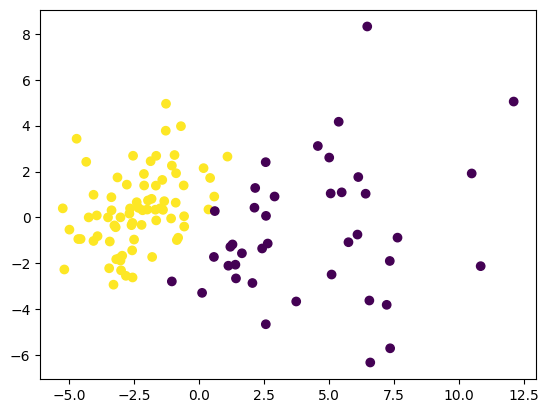

In [25]:
plt.scatter(x_test_df.iloc[:, 0], x_test_df.iloc[:, 1],
            c= y_pred
            )

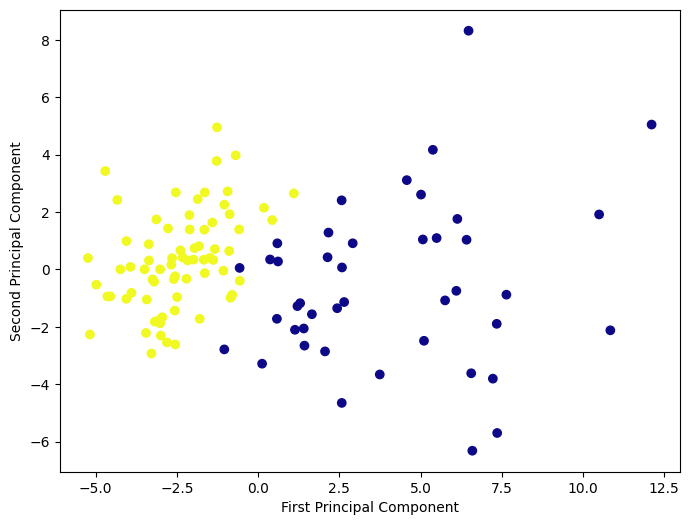

In [26]:

# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1],
            c=y_test['target'],
            cmap='plasma')

# # labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


#**Well Done :)**
Now let's practice!